# Análisis de regresión logística    

Con este tipo nos va a ayudar a predecir variables categóricas o hacer modelos que puedan estimar su valor. Puede ser para diferentes categorías, en este caso la ocuparemos para saber el sexo de los pingüinos.

La regresión que nos ayuda a saber que variables predictivas nos ayudan a definir si un pingüino es macho o hembra, se le conoce como el análisis de regresión logística

In [1]:
# Importando librerías 
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de las gráficas

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Datos Preprocesados

In [4]:
processed_penguins_df = pd.read_csv('dataset/penguins.csv').dropna()

In [10]:
processed_penguins_df =(
    processed_penguins_df
    .assign(
        numeric_sex=lambda df: df.sex.replace(['female','male'],[0,1])
    )
)

In [13]:
processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,1
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,1
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,1


In [12]:
for columna in processed_penguins_df.columns:
    print(columna)

species
island
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
sex
year
numeric_sex


## Análisis de regresión logística

#### **¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?**

Para una regresión logística y requiere 2 parámetros
```js
logit()
```
Ademas recordemos que hicimos el proceso de convertir nuestra variable categórica de **sex** a una numérica con el apoyo de la anterior celda de código. Así que vamos a hacer uso de ella mediante la regresión logística.

Vamos a agregar variables a lo loco y ver el efecto que producen.

In [11]:
smf.logit(
    formula= 'numeric_sex ~flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Wed, 07 Aug 2024   Pseudo R-squ.:                  0.4793
Time:                        23:49:27   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

Vamos a ver que resultados nos trae. Nos enfocáremos en la sección de resultados coef. 

Aquí metimos variables categóricas, en la anterior regresión nos habíamos encontrado con **pendiente** en el coeficiente, aquí tendremos un **número (log() -odds)** que representa el logaritmo de las relaciones de probabilidad (ratio). Lo importante es que si es:
- negativo: es menos probable que suceda.
- positivo: mas probable que suceda o asociado a lo que tratamos de predecir.

**IMPORTANTE:** Dado que definimos que los machos son el 1 en el arreglo de `numeric_sex`, entonces todos los números que veamos serán respecto de los machos. En resumen son números que describen el comportamiento de los machos.


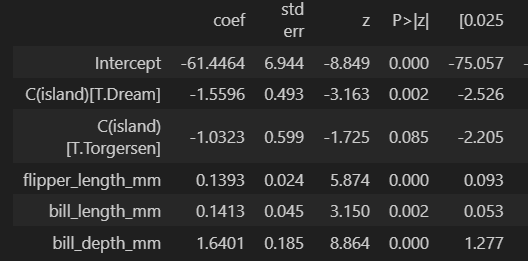

Comencemos con las numéricas que son las mas sencillas de interpretar. 
- longitud de aleta: tiene un valor de 0.1393 y positivo, entonces nos dice que es mas probable que encontremos un pingüino macho si consideramos `flipper_length_mm`. Así como pasa con `bil_length_mm` y `bil_depth_mm`. Así lo relacionamos con la selección de macho, pero para ver si es significativamente estadístico lo vemos en la columna **P>|z|**.

Recordemos que tenemos 3 islas y solo nos aparecen 2. ¿qué está pasando?

In [14]:
processed_penguins_df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

La única que no aparece es **Biscoe**,eso significa que los valores están asociados al comparar la isla **Dream vs Biscoe**, la isla **Torgersen vs Biscoe**. Es decir el parámetro que no aparezca es el parámetro de referencia.

Eso quiere decir que es:
- menos probable que sea macho si se encuentra en la isla Dream, respecto a la isla Biscoe.
- la probabilidad de encontrar un pingüino macho en la isla Torgerser es menor respecto la isla Biscoe.



Lo que parece ser que en la isla Biscoe tenemos más machos o podría pasar otra cosa dentro de esa isla. Parece ser que hay 83 machos en Biscoe.

Lo podemos verificar explorando nuestro conjunto de datos y ver si realmente es así.

Pero entonces cual es la probabilidad de que hay pingüinos machos en Dream o Torgersen: Para ello nosotros tenemos que restar el valor para compararlo:

Quedaría como Dream - Torgersen:
- -1.56 - (-1.03)

In [35]:
-1.56 -(-1.03)

-0.53

Entonces me da - 0.53, y me dice que es más probable encontrar machos en Dream que en Torgersen. Esa sería la interpretación de los logaritmos.

In [33]:
Dream = processed_penguins_df[ processed_penguins_df['island']=='Dream']
Tor = processed_penguins_df[ processed_penguins_df['island']=='Torgersen']
Biscoe = processed_penguins_df[ processed_penguins_df['island']=='Biscoe']
ma_drem = len(Dream[Dream['numeric_sex']==1])
ma_tor = len(Tor[Tor['numeric_sex']==1])
ma_biscoe = len(Biscoe[Biscoe['numeric_sex']==1])

In [34]:
#Machos según la isla
print(f'Numero de machos por isla')
print(f'Dream: {ma_drem}\nTor: {ma_tor}\nBiscoe: {ma_biscoe}')

Numero de machos por isla
Dream: 62
Tor: 23
Biscoe: 83


#### Exploración de nuestras variables categóricas

Vamos a contar la aparición de nuestras variables categóricas

In [36]:
(
    processed_penguins_df
    .value_counts(['island','sex'])
    .reset_index(name='count')
)

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


Encontramos que en la isla Biscoe tiene muchos mas conteos de machos y hembras en general que las otras islas. Que a su vez coincide con los coeficientes de la regresión logística. De nuevo algo que encontramos con la regresión logística que nos podría ayudar a predecir algo, pero quizás lo que predice es que nuestros datos no están realmente balanceados y se está sesgando nuestro modelo. Entonces lo viable es seguir explorando, pero lo seguiremos aprendiendo en futuros cursos.

#### ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada especie?

Dejando de lado la temática pasada, ¿qué tal si nosotros queremos saber si un pingüino pertenece a determinada especie. 

In [37]:
processed_penguins_df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

Creamos una nueva columna en nuestros Data Frame para saber si un pingüino es de determinada especie

In [44]:
processed_penguins_df = (
    processed_penguins_df
    .assign(is_chinstrap=lambda df:df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'],[0,1,1])

    )
)

In [47]:
processed_penguins_df 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex,is_chinstrap
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1,0
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,1,1
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0,1
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,1,1
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,1,1


Entonces ya podemos empezar a crear nuestro modelo.

In [49]:
model_is_chinstrap = smf.logit(
    formula='is_chinstrap ~ flipper_length_mm + sex ',
    data=processed_penguins_df
).fit()

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Podemos ver que está sucediendo con el modelo

In [53]:
model_is_chinstrap.params

Intercept           -40.568368
sex[T.male]          -1.282656
flipper_length_mm     0.209705
dtype: float64

Sexo macho y la longitud de la aleta, donde uno es positivo. 

Entonces decimos es menos probable que un pingüino **Chinstrap** sea macho que hembra, y es más probable que este pingüino tenga una aleta más grande.

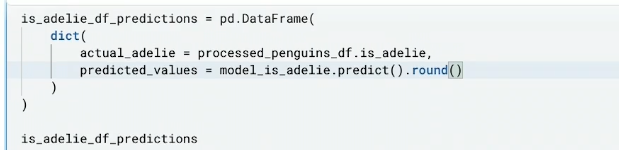

In [55]:
is_chinstrap_dfpre = pd.DataFrame( 
    dict(
        actual_chinstrap=processed_penguins_df.is_chinstrap,
        predicted_values=model_is_chinstrap.predict().round()
    )
)
is_chinstrap_dfpre

,actual_chinstrap,predicted_values
0,0,0.0
1,0,0.0
2,0,1.0
4,0,0.0
5,0,0.0
...,...,...
339,1,1.0
340,1,1.0
341,1,0.0
342,1,1.0


Contar las apariciones de estos valores, con nuestro data Frame

In [56]:
(
    is_chinstrap_dfpre
    .value_counts(['actual_chinstrap','predicted_values'])
    .reset_index(name='count')
)

,actual_chinstrap,predicted_values,count
0,1,1.0,151
1,0,0.0,129
2,1,0.0,36
3,0,1.0,17


Ya tengo una manera de representar:

0. cuantos pingüinos que eran machos fueron representados como machos: 151
1. cuantos pingüinos que eran hembras fueron representados como hembras: 129
2. cuantos pingüinos que eran machos fueron representados como hembras: 36
3. cuantos pingüinos que eran hembras fueron representados como machos: 17

Otra forma de verlo es a traves de una matriz de confusión, lo que me dice es justamente, como estaban distribuidos mis datos y que tan bien lo hice.

Para eso usamos Scikit Learn

In [58]:
#Matriz de correlación 
print(
    sklearn.metrics.confusion_matrix(
        is_chinstrap_dfpre.actual_chinstrap,
        is_chinstrap_dfpre.predicted_values
    )
)

[[129  17]
 [ 36 151]]


Solo necesitamos meter los valores que necesitamos comparar, y tenemos nuestra matriz de correlación que nos va a decir lo mismo que obtuvimos con la tabla anterior.

In [59]:

sklearn.metrics.accuracy_score(
    is_chinstrap_dfpre.actual_chinstrap,
    is_chinstrap_dfpre.predicted_values
)

0.8408408408408409

Esto nos va a decir la exactitud que tuve en los modelos, es decir 0.84, y es una buena predicción.

Entonces recuerda que siempre debemos explorar los datos para llegar a valores mucho más precisos.